# Import Modules

In [1]:
%autosave 30
import cv2
# import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import time

Autosaving every 30 seconds


# cv2_imshow for desktop

In [2]:
"""Colab-specific patches for functions."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

__all__ = ['cv2_imshow', 'cv_imshow']

import cv2
from IPython import display
import PIL


def cv2_imshow(a):

    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display.display(PIL.Image.fromarray(a))


cv_imshow = cv2_imshow

# Import Image

In [3]:
path = r'dataset/bird.jpg' # r'dataset/test.png' #
img = cv2.imread(path)

# View Import image and shape

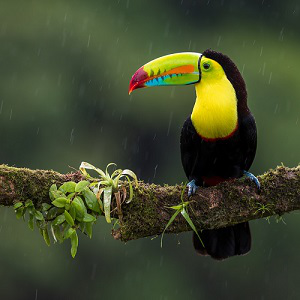

(300, 300, 3)

In [4]:
cv2_imshow(img)
img.shape

# Convolution Function

In [5]:
def convo(img, kernel):
    row, col, rgb = img.shape
    ker_len = len(kernel)
    arr1 = []
    for i in range(0, row - ker_len + 1):
        arr2 = []
        for j in range(0, col - ker_len + 1):
            arr3 = []
            for k in range(rgb):
                mat = img[i:i+ker_len, j:j+ker_len, k]
                summation = np.sum(mat * kernel)
                arr3.append(summation)
            arr = np.array(arr3)
            arr2.append(arr)
        arr = np.array(arr2)
        arr1.append(arr)
    arr = np.array(arr1)
    return arr

# Padding Function

In [6]:
def padding_img(image, padding):
    if padding==0:
        return image
    row, col, rgb = image.shape
    img = np.zeros((row + 2 * padding, col + 2 * padding, rgb), dtype=image.dtype)
    img[padding : -padding, padding : -padding, :] = image
    return img

# ReLU Function

In [7]:
def relu(img):
    arr = np.maximum(0,img)
    return arr

# Max Pooling Function

In [8]:
def max_pooling(img, filter_size, stride):
    row, col, rgb = img.shape
    arr1 = []
    for i in range(0, row - filter_size + 1, stride):
        arr2 = []
        for j in range(0, col - filter_size + 1, stride):
            arr3 = []
            for k in range(rgb):
                mat = img[i:i+filter_size, j:j+filter_size, k]
                maxi = np.max(mat)
                arr3.append(maxi)
            arr = np.array(arr3)
            arr2.append(arr)
        arr = np.array(arr2)
        arr1.append(arr)
    arr = np.array(arr1)
    return arr

# Different Kernels

In [9]:
kernel1 = np.array([[1, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1]
                  ])

In [10]:
kernel2 = np.array([[0, 0, 0, 0, 1],
                    [0, 0, 0, 1, 0],
                    [0, 0, 1, 0, 0],
                    [0, 1, 0, 0, 0],
                    [1, 0, 0, 0, 0]
                  ])

In [11]:
# kernel3 = np.array([[1, 0, 0, 0, 1],
#                     [0, -1, 0, -1, 0],
#                     [0, 0, -5, 0, 0],
#                     [0, -1, 0, -1, 0],
#                     [1, 0, 0, 0, 1]
#                   ])
#Sharpen 
kernel3 = np.array([[0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

In [12]:
kernel4 = np.array([[0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0]
                  ])

In [13]:
kernel5 = np.array([[0, 0, -1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, -1, 0, 0]
                  ])

In [14]:
kernel = np.array([kernel1, kernel2, kernel3, kernel4, kernel5])

# Apply Convolution

In [15]:
images = []
for ker in kernel:
    image = convo(img, ker)
    images.append(image)
images = np.array(images)
im = np.copy(images)

(296, 296, 3)


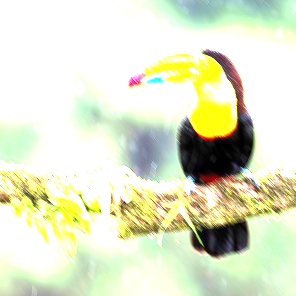

(296, 296, 3)


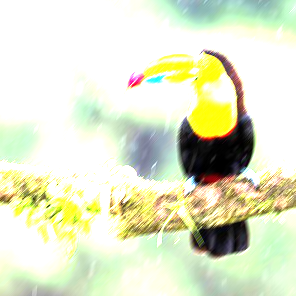

(298, 298, 3)


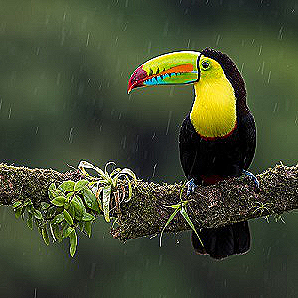

(296, 296, 3)


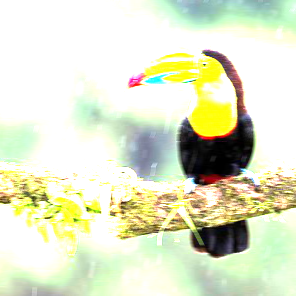

(296, 296, 3)


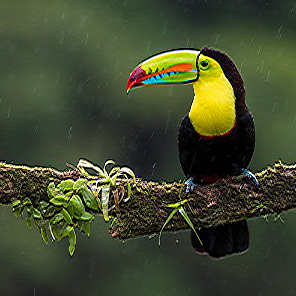

In [16]:
for image in images:
    print(image.shape)
    cv2_imshow(image)

# Apply ReLU

In [17]:
img_relu = []
for image in images:
    img = relu(image)
    img_relu.append(img)
img_relu = np.array(img_relu)

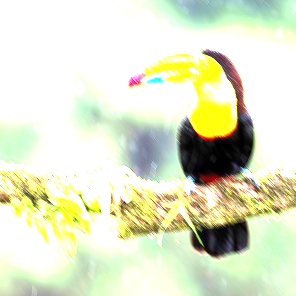

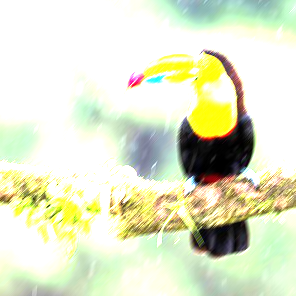

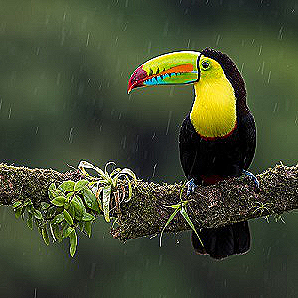

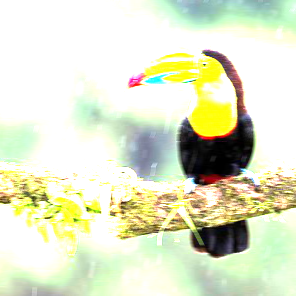

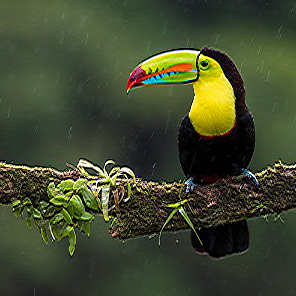

In [18]:
for image in img_relu:
    cv2_imshow(image)

# Apply Max Pooling

In [21]:
img_pooling = []
for image in img_relu:
    img = max_pooling(image, 2, 2)
    img_pooling.append(img)
img_pooling = np.array(img_pooling)

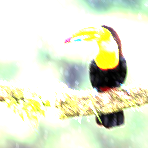

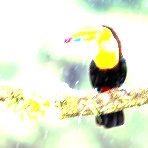

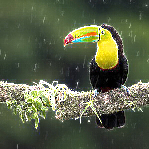

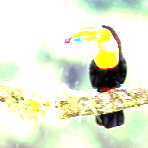

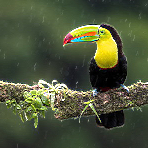

In [22]:
for image in img_pooling:
    cv2_imshow(image)